Test an approach by Yannick by using the darts package:
(https://unit8co.github.io/darts/generated_api/darts.models.forecasting.random_forest.html#)

Important notice: the aim is to use historical values of our indices to predict future returns. based on these returns we try to construct portfolios and compare the results with classic approaches such as EW or HA.

In [2]:
import pandas as pd
import numpy as np
from darts import TimeSeries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from darts.models import LinearRegressionModel, RegressionModel, RandomForest, RegressionEnsembleModel
from sklearn import cross_decomposition
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from darts.metrics import mape, r2_score
import sklearn

/Users/antonkruse/.pyenv/versions/3.9.13/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ts = TimeSeries.from_csv('data/price_data_filtered.csv', parse_dates=True, index_col=0)
ts = ts.astype('float32')

<Axes: >

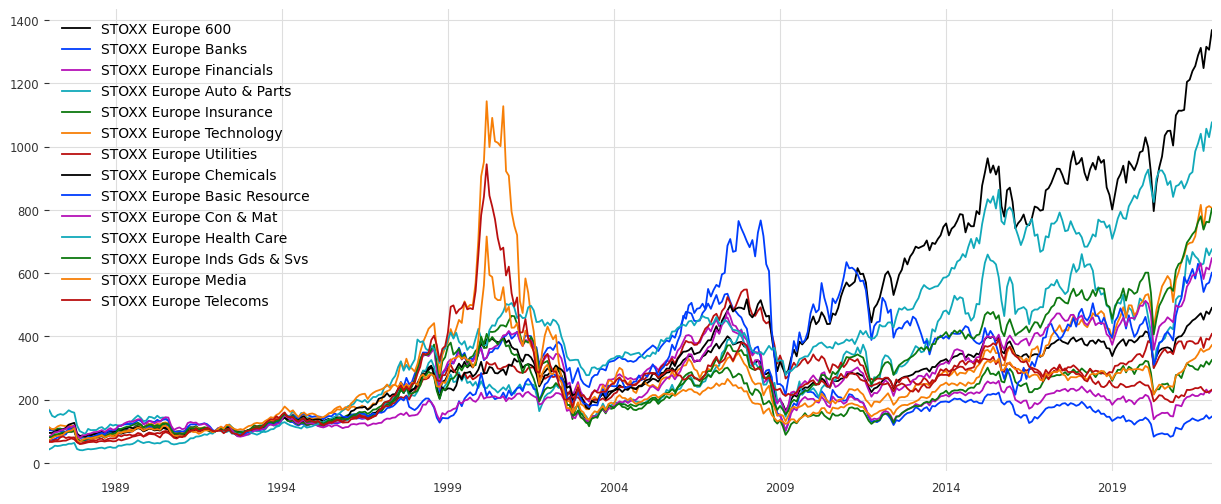

In [7]:
df = pd.read_csv('data/price_data_filtered.csv', parse_dates=True, index_col=0)
df.plot(figsize=(15, 6))

In [4]:
ts_stoxx = ts['STOXX Europe 600']
#ts['STOXX Europe 600'].plot()

In [5]:
train, test = ts_stoxx.split_after(0.8)

In [6]:
#train.plot(label="training")
#test.plot(label="testing")

### Shrinkage methods:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Elastic Net
- Bridge Regression

We can use the Linear Regression model offered by darts and the (general) Regression model for all other shrinkage methods, where we need to define the specific sklearn model within the "model" parameter.

In [7]:
# linear regression model
linear_regression = LinearRegressionModel(lags=1, output_chunk_length=1)
linear_regression.fit(train)
linear_forecast = linear_regression.predict(len(test))

In [70]:
# ridge regression model
ridge_regression = RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.Ridge(alpha=1))
ridge_regression.fit(train)
ridge_forecast = ridge_regression.predict(len(test))

In [47]:
# lasso regression model
lasso_regression = RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.Lasso(alpha=1))
lasso_regression.fit(train)
lasso_forecast = lasso_regression.predict(len(test))

In [48]:
# elastic net regression model
elastic_net_regression = RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.ElasticNet(alpha=1))
elastic_net_regression.fit(train)
elastic_net_forecast = elastic_net_regression.predict(len(test))

In [49]:
# bridge regression model
bridge_regression = RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.LassoLarsCV(cv=3))
bridge_regression.fit(train)
bridge_forecast = bridge_regression.predict(len(test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

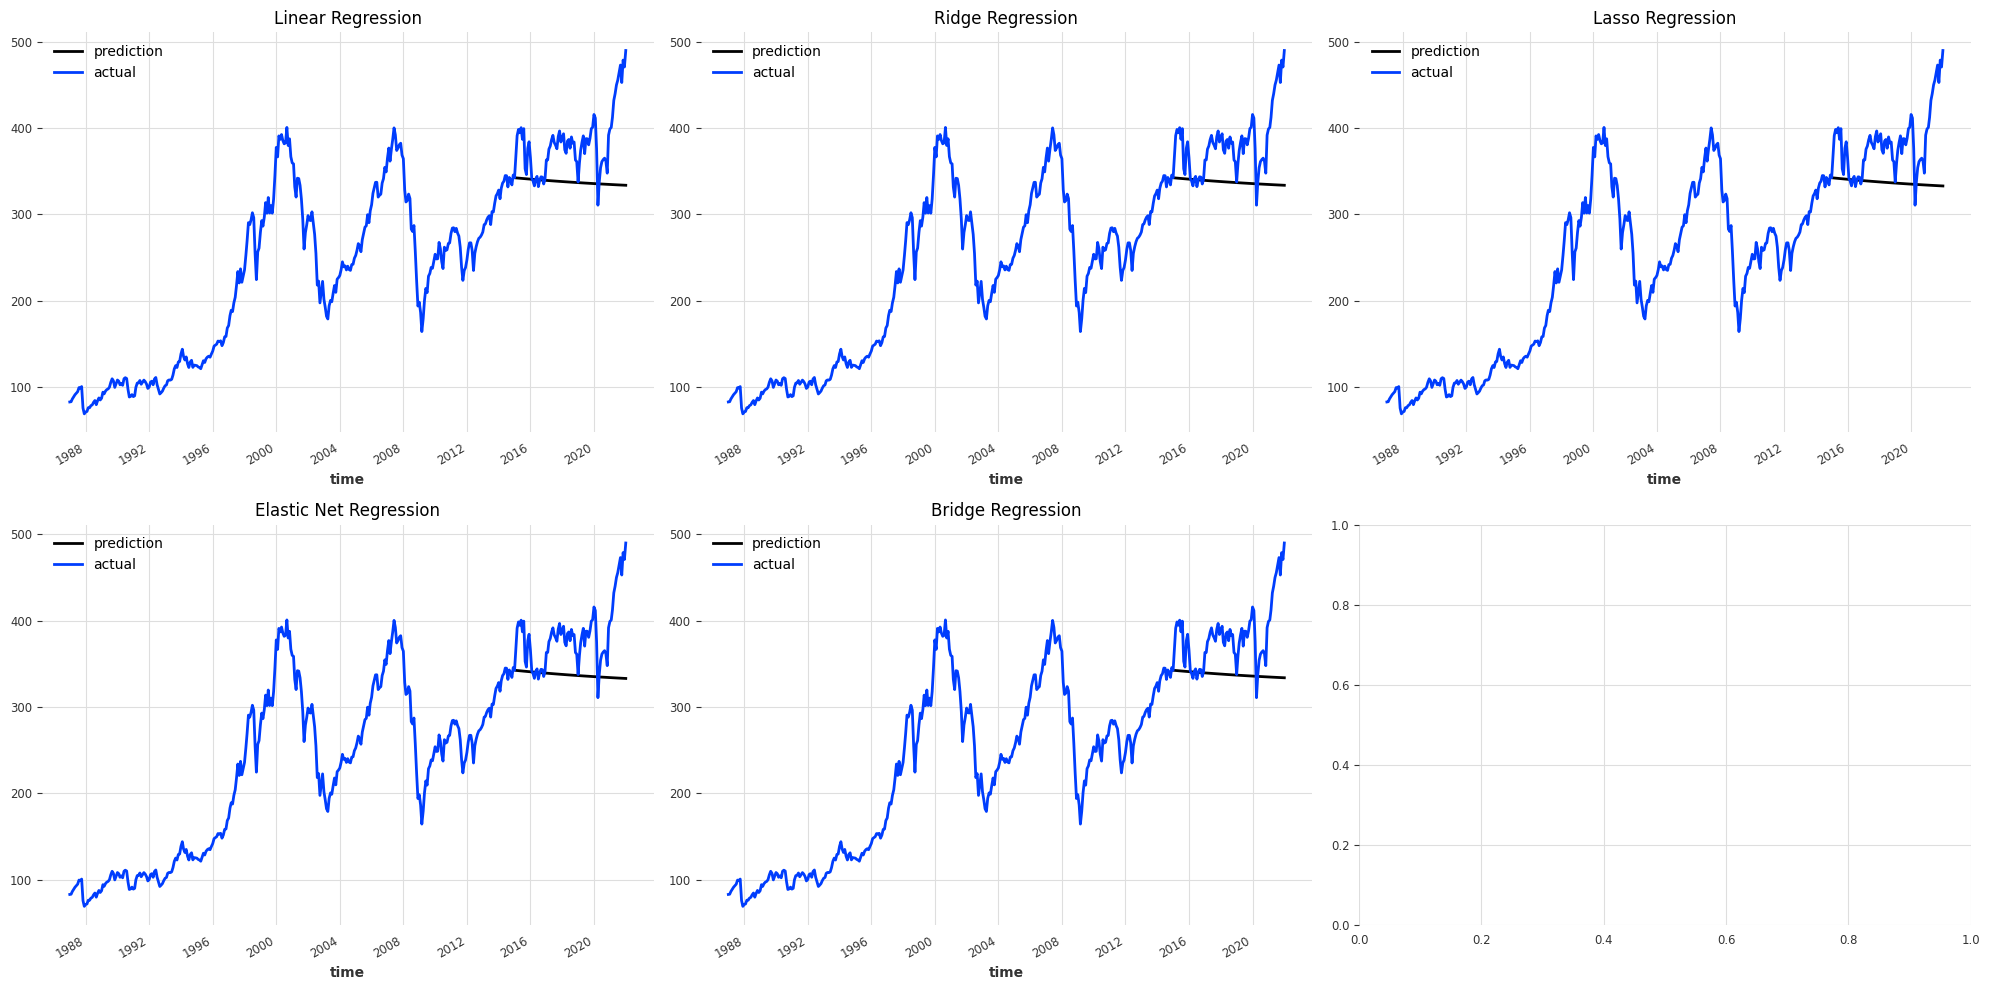

In [50]:
# Plot the predictions
shrinkage_forecasts = {'Linear Regression': linear_forecast,
                       'Ridge Regression': ridge_forecast,
                       'Lasso Regression': lasso_forecast,
                       'Elastic Net Regression': elastic_net_forecast,
                       'Bridge Regression': bridge_forecast}

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

for i, (name, forecast) in enumerate(shrinkage_forecasts.items()):
    forecast.plot(label='prediction', ax=ax[i])
    ts_stoxx.plot(label='actual', ax=ax[i])
    ax[i].legend()
    ax[i].set_title(name)

plt.tight_layout();

### Dimensionality reduction methods

- PLS regression
- PLS Canonical
- CCA

We can use the (general) Regression model for all other shrinkage methods, where we need to define the specific sklearn model within the "model" parameter.

In [51]:
pls_regression = RegressionModel(lags=1, output_chunk_length=1, model= sklearn.cross_decomposition.PLSRegression(n_components=1))
pls_regression.fit(train)
pls_forecast = pls_regression.predict(len(test))

In [52]:
pls_canonical = RegressionModel(lags=1, output_chunk_length=1, model= sklearn.cross_decomposition.PLSCanonical(n_components=1))
pls_canonical.fit(train)
pls_canonical_forecast = pls_canonical.predict(len(test))

In [53]:
cca = RegressionModel(lags=1, output_chunk_length=1, model= sklearn.cross_decomposition.CCA(n_components=1))
cca.fit(train)
cca_forecast = cca.predict(len(test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


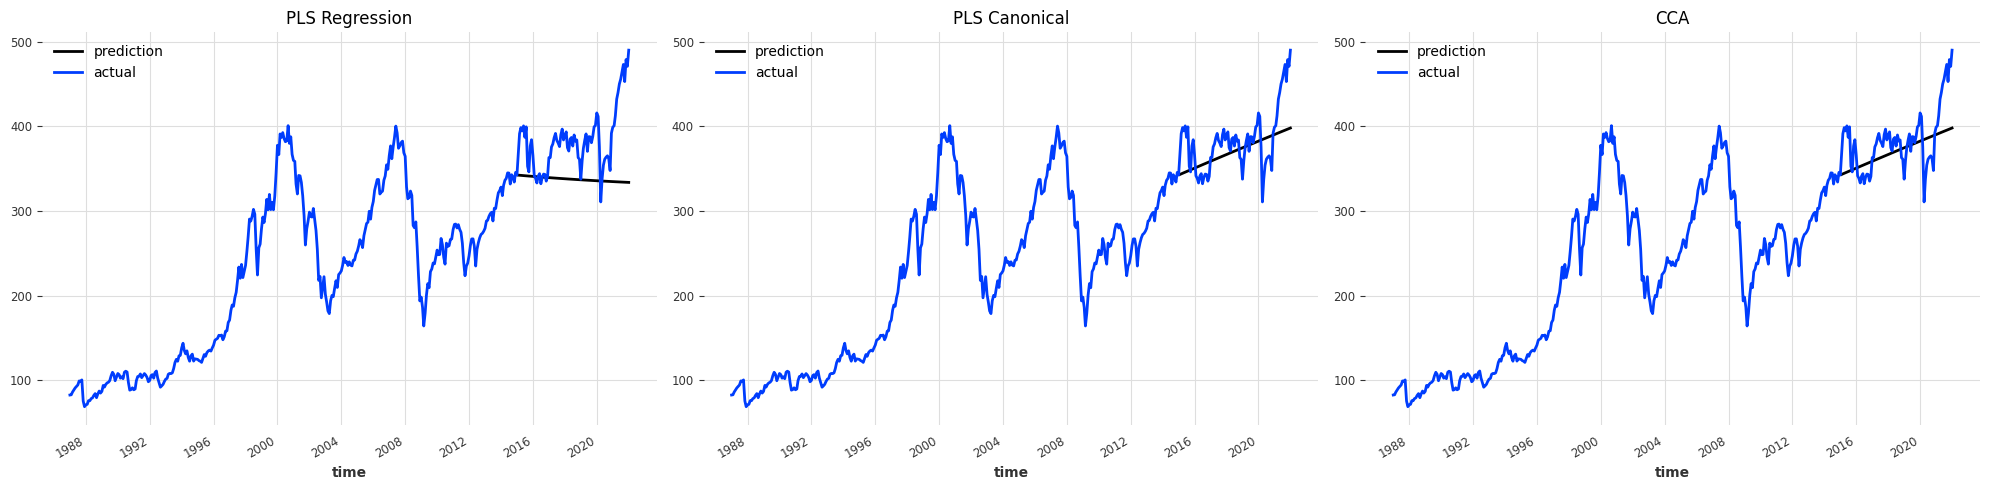

In [54]:
# Plot the predictions
dimensionality_forecasts = {'PLS Regression': pls_forecast,
                            'PLS Canonical': pls_canonical_forecast,
                            'CCA': cca_forecast}

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.flatten()

for i, (name, forecast) in enumerate(dimensionality_forecasts.items()):
    forecast.plot(label='prediction', ax=ax[i])
    ts_stoxx.plot(label='actual', ax=ax[i])
    ax[i].legend()
    ax[i].set_title(name)

plt.tight_layout();

### Non-linear ML methods

- Random Forest Regressor
- Gradient Boosting Regressor
- Ada Boost Regressor 
- ExtraTreesRegressor
- Support Vector Machine Regressor

In [55]:
# random forest model
random_forest = RandomForest(lags=100, output_chunk_length=1, n_estimators=100)
random_forest.fit(train)
random_forest_forecast = random_forest.predict(len(test))

In [56]:
# gradient boosting model
gb_boosting = RegressionModel(lags=100, output_chunk_length=1, 
                              model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0))
gb_boosting.fit(train)
gb_boosting_forecast = gb_boosting.predict(len(test))

In [57]:
# ada boosting model
ada_boosting = RegressionModel(lags=1, output_chunk_length=1,
                                 model=sklearn.ensemble.AdaBoostRegressor(n_estimators=1000000, random_state=0))
ada_boosting.fit(train)
ada_boosting_forecast = ada_boosting.predict(len(test))

In [58]:
# extra tree regression model
extra_tree = RegressionModel(lags=1, output_chunk_length=1,
                                    model=sklearn.ensemble.ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0))
extra_tree.fit(train)
extra_tree_forecast = extra_tree.predict(len(test))

In [59]:
# support vector regression model
svr = RegressionModel(lags=1, output_chunk_length=1,
                                model=sklearn.svm.SVR(kernel='rbf', C=1e3, gamma=0.1))
svr.fit(train)
svr_forecast = svr.predict(len(test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

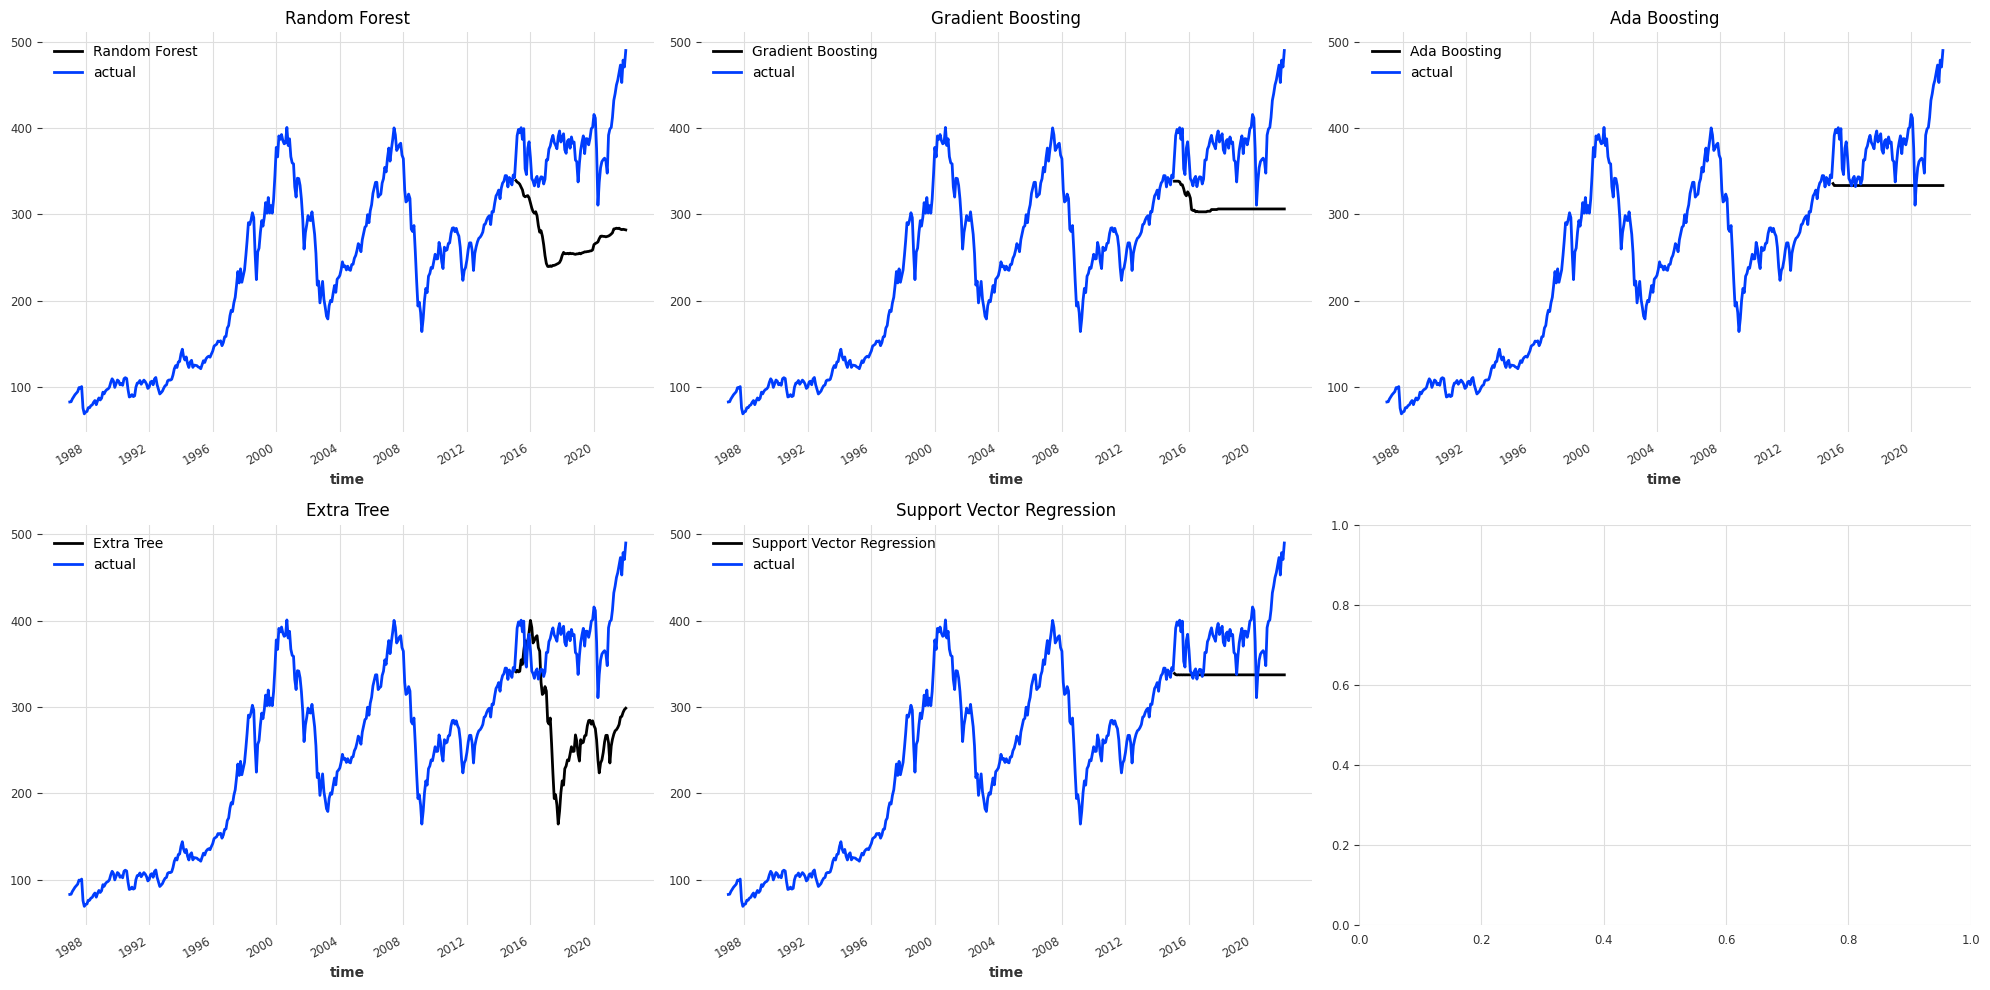

In [60]:
nonlinear_ML_forecasts = {'Random Forest': random_forest_forecast,
                          'Gradient Boosting': gb_boosting_forecast,
                          'Ada Boosting': ada_boosting_forecast,
                          'Extra Tree': extra_tree_forecast,
                          'Support Vector Regression': svr_forecast}

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

for i, (name, forecast) in enumerate(nonlinear_ML_forecasts.items()):
    forecast.plot(label=name, ax=ax[i])
    ts_stoxx.plot(label='actual', ax=ax[i])
    ax[i].legend()
    ax[i].set_title(name)
    
plt.tight_layout();

### Combination ML models

- combination shrinkage
- combination dimensionality reduction
- combination nonlinear ML

In [61]:
# ensemble of regression models
shrinkage_ensemble = [LinearRegressionModel(lags=1, output_chunk_length=1),
                      RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.Ridge(alpha=1)),
                       RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.Lasso(alpha=1)),
                       RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.ElasticNet(alpha=1)),
                       RegressionModel(lags=1, output_chunk_length=1, model=sklearn.linear_model.LassoLarsCV(cv=3))]

shrinkage_ensemble_model = RegressionEnsembleModel(forecasting_models=shrinkage_ensemble, regression_train_n_points=100)
shrinkage_ensemble_model.fit(train)
shrinkage_ensemble_forecast = shrinkage_ensemble_model.predict(len(test))

In [62]:
# ensemble of dimsenionality reduction models
dim_ensemble = [RegressionModel(lags=1, output_chunk_length=1, model=sklearn.cross_decomposition.PLSRegression(n_components=1)),
                RegressionModel(lags=1, output_chunk_length=1, model=sklearn.cross_decomposition.PLSCanonical(n_components=1)),
                RegressionModel(lags=1, output_chunk_length=1, model=sklearn.cross_decomposition.CCA(n_components=1))]

dim_ensemble_model = RegressionEnsembleModel(forecasting_models=dim_ensemble, regression_train_n_points=100)
dim_ensemble_model.fit(train)
dim_ensemble_forecast = dim_ensemble_model.predict(len(test))

In [63]:
# ensemble of nonlinear models
nonlinear_ensemble = [RandomForest(lags=100, output_chunk_length=1, n_estimators=100),
                        RegressionModel(lags=100, output_chunk_length=1, model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)),
                        RegressionModel(lags=1, output_chunk_length=1, model=sklearn.ensemble.AdaBoostRegressor(n_estimators=1000000, random_state=0)),
                        RegressionModel(lags=1, output_chunk_length=1, model=sklearn.ensemble.ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)),
                        RegressionModel(lags=1, output_chunk_length=1, model=sklearn.svm.SVR(kernel='rbf', C=1e3, gamma=0.1))]

nonlinear_ensemble_model = RegressionEnsembleModel(forecasting_models=nonlinear_ensemble, regression_train_n_points=100)
nonlinear_ensemble_model.fit(train)
nonlinear_ensemble_forecast = nonlinear_ensemble_model.predict(len(test))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


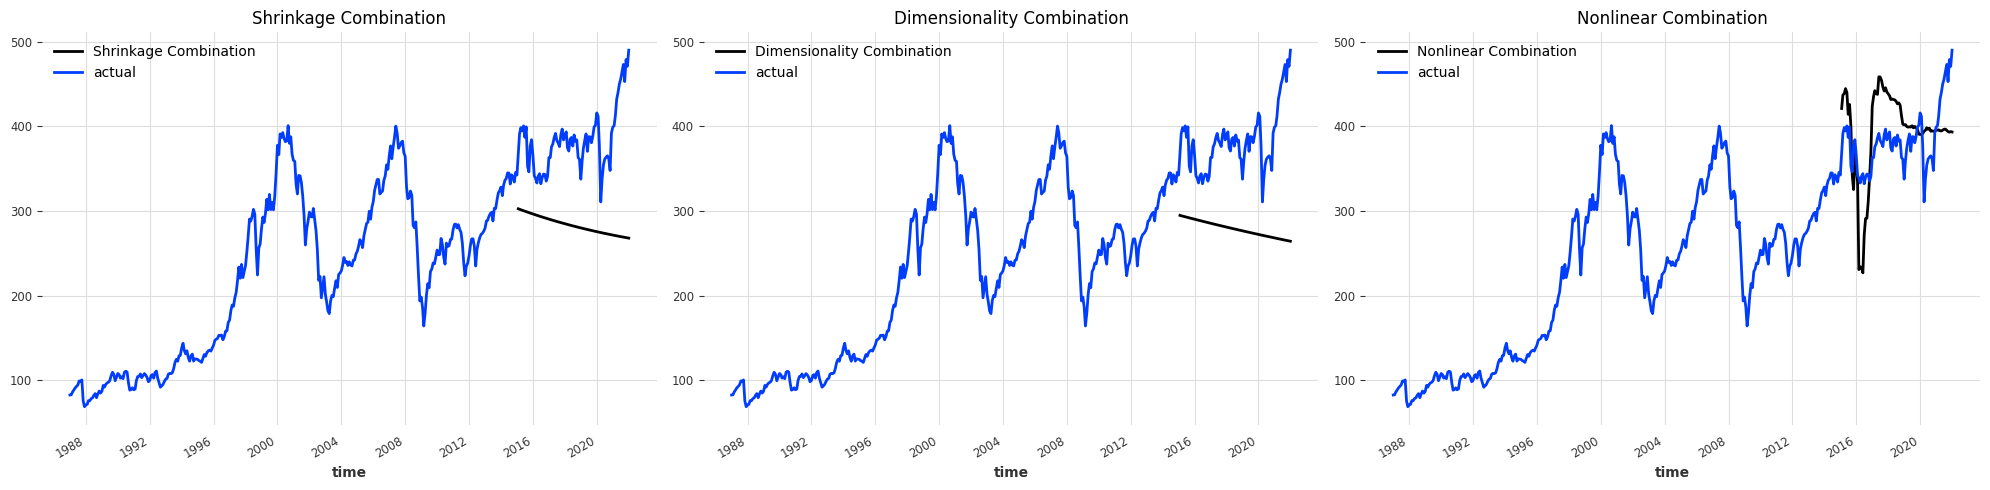

In [64]:
combination_forecasts = {'Shrinkage Combination': shrinkage_ensemble_forecast,
                         'Dimensionality Combination': dim_ensemble_forecast,
                         'Nonlinear Combination': nonlinear_ensemble_forecast}

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.flatten()

for i, (name, forecast) in enumerate(combination_forecasts.items()):
    forecast.plot(label=name, ax=ax[i])
    ts_stoxx.plot(label='actual', ax=ax[i])
    ax[i].legend()
    ax[i].set_title(name)
    
plt.tight_layout();

### Hypertuning

Now we have deployed most of the relevant methods used in the replication paper. So far we used random parameters to define our models.

Therefore, we need to get the best parameters for each models to extract the optimal outcome.

Approach 1: Using GridSearch()

Model 1: Linear Regression

In [47]:
lm_parameters = {
    'lags': [1, 2, 3, 4, 5],
    'output_chunk_length': [1, 2, 3, 4, 5]
}

result = linear_regression.gridsearch(parameters=lm_parameters, series=ts_stoxx, forecast_horizon=5)
best_model = result[1]
best_parameters = result[2]
print('Best model: ', best_model, ' with parameters: ', best_parameters)

Best model:  {'lags': 3, 'output_chunk_length': 1}  with parameters:  6.009692550695317


In [44]:
# hypertuned linear regression model
linear_regression_hyper = LinearRegressionModel(lags=3, output_chunk_length=1)
linear_regression_hyper.fit(train)
linear_forecast_hyper = linear_regression_hyper.predict(len(test))

In [45]:
lm_score = mape(ts_stoxx, linear_forecast)
lm_score_hyper = mape(ts_stoxx, linear_forecast_hyper)
print('MAPE of linear model: ', lm_score, ' with hyperparameter tuning: ', lm_score_hyper)

MAPE of linear model:  11.512245237827301  with hyperparameter tuning:  14.59469199180603


MAPE stands for Mean Absolute Percentage Error and is a commonly used metric to evaluate the performance of forecasting models. It is expressed as a percentage and indicates how much the model's predictions deviate, on average, from the actual values. The lower the MAPE value, the better the model's performance.

In this case, we have two MAPE values: one for a linear model without hyperparameter tuning (11.512%) and one for a linear model with hyperparameter tuning (14.595%). This means that the model with hyperparameter tuning has a higher MAPE, indicating that its predictions deviate more from the actual values compared to the model without hyperparameter tuning.

Due to common sense, the Mape should be lower after hyperparameter tuning, which is not the case. Meaning there is an error in my code.

Model 2: Ridge Regression

In [72]:
rr_parameters = {
    'lags': [1, 2, 3, 4, 5],
    'output_chunk_length': [1, 2, 3, 4, 5]
}

result = ridge_regression.gridsearch(parameters=rr_parameters, series=ts_stoxx, forecast_horizon=5)
best_model = result[1]
best_parameters = result[2]
print('Best model: ', best_model, ' with parameters: ', best_parameters)

Best model:  {'lags': 3, 'output_chunk_length': 1}  with parameters:  6.009692550695317


In [68]:
# hypertuned ridge regression model
ridge_regression_hyper = RegressionModel(lags=3, output_chunk_length=1, model=sklearn.linear_model.Ridge(alpha=0.1))
ridge_regression_hyper.fit(train)
ridge_forecast_hyper = ridge_regression_hyper.predict(len(test))

In [71]:
# parameter ridge: alpha = 1, lags = 1, output_chunk_length = 1
# parameter ridge hyper: alpha = 0.1, lags = 3, output_chunk_length = 1

rr_score = mape(ts_stoxx, ridge_forecast)
rr_score_hyper = mape(ts_stoxx, ridge_forecast_hyper)
print('MAPE of ridge model: ', rr_score, ' with hyperparameter tuning: ', rr_score_hyper)

MAPE of ridge model:  11.512933671474457  with hyperparameter tuning:  14.593945443630219


In this case, we have two MAPE values: one for a Ridge model without hyperparameter tuning (11.513%) and one for a Ridge model with hyperparameter tuning (14.594%). This means that the model with hyperparameter tuning has a higher MAPE, indicating that its predictions deviate more from the actual values compared to the model without hyperparameter tuning.

Due to common sense, the Mape should be lower after hyperparameter tuning, which is not the case. Meaning there is an error in my code.

In [73]:
rf_parameters = {
    'lags': [1, 5, 10, 20, 50, 100],
    'output_chunk_length': [1, 2, 3, 4, 5],
    'n_estimators': [10, 50, 100, 200, 500, 1000]
}

result = RandomForest.gridsearch(parameters=rf_parameters, series=ts_stoxx, forecast_horizon=5)
best_model = result[1]
best_parameters = result[2]
print('Best model: ', best_model, ' with parameters: ', best_parameters)

In [ ]:
# hypertuned random forest model
random_forest_hyper = RandomForest(lags=100, output_chunk_length=1, n_estimators=100)
random_forest_hyper.fit(train)
random_forest_forecast_hyper = random_forest_hyper.predict(len(test))

In [ ]:
# parameter random forest: 
# parameter random forest hyper: 

rf_score = mape(ts_stoxx, random_forest)
rr_score_hyper = mape(ts_stoxx, random_forest_hyper)
print('MAPE of ridge model: ', rf_score, ' with hyperparameter tuning: ', rf_score_hyper)